In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #过滤警告错误

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data() #读取MNIST资料

In [3]:
#将features（数字影像特征值）以reshape转换为6000*28*28*1的4维矩阵
x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [4]:
#将features标准化，可以提高模型预测的准确度，并且更快收敛
x_train4D_normalize = x_train4D / 255
x_test4D_normalize = x_test4D / 255

In [5]:
#使用np_utils.to_categorical, 将训练资料集与测试的label,进行 Onehot encoding 转换
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

In [6]:
y_test #查看y测试集的标签

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
#建立keras的Sequential模型（线性堆积模型），后续只需要使用model.add()方法，将各神经网络层加入模型即可
model = Sequential()
#建立卷积层1.
#输入的数字影像是28*28大小，执行第一次卷积运算，会产生16个卷积核，卷积运算并不会改变影像大小，所以仍然是28*28大小。
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',#补零
                input_shape=(28,28,1),
                activation='relu'))

#建立池化层
#输入参数pool_size=(2,2),执行第一次缩减取样，将16个28*28影像，缩小为16个14*14的影像。
model.add(MaxPooling2D(pool_size=(2,2)))

#建立卷积层2.
#输入的数字影像是28*28大小，执行第2次卷积运算，将原本16个的影像，转换为36个影像，卷积运算并不会改变影像大小，所以仍然是14*14大小。
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',#补零
                activation='relu'))

#建立池化层2
#输入参数pool_size=(2,2),执行第2次缩减取样，将36个14*14影像，缩小为36个7*7的影像。
model.add(MaxPooling2D(pool_size=(2,2)))

#加入Dropout(0.25)层至模型中。其功能是，每次训练迭代时，会随机的在神经网络中放弃25%的神经元，以避免overfitting。
model.add(Dropout(0.25))

#建立平坦层
#之前的步骤已经建立池化层2，共有36个7*7影像，转换为1维的向量，长度是36*7*7=1764，也就是1764个float数字，正好对应到1764个神经元。
model.add(Flatten())

#建立隐藏层，共有128个神经元
model.add(Dense(128,activation='relu'))

#加入Dropout(0.5)层至模型中。其功能是，每次训练迭代时，会随机的在神经网络中放弃50%的神经元，以避免overfitting。
model.add(Dropout(0.5))

#建立输出层
#共有10个神经元，对应到0-9共10个数字。并且使用softmax激活函数进行转换，softmax可以将神经元的输出，转换为预测每一个数字的几率。
model.add(Dense(10,activation='softmax'))

In [9]:
#查看模型的摘要
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [10]:
#进行训练
#定义训练方式
#在模型训练之前，我们必须使用compile方法，对训练模型进行设定
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])  #将metrics设为accuracy

In [11]:
#开始训练
train_history = model.fit(x=x_train4D_normalize,
                       y=y_trainOneHot,validation_split=0.2,
                       epochs=10,batch_size=300,verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.4671 - accuracy: 0.8540 - val_loss: 0.1012 - val_accuracy: 0.9693
Epoch 2/10
 - 2s - loss: 0.1336 - accuracy: 0.9600 - val_loss: 0.0655 - val_accuracy: 0.9808
Epoch 3/10
 - 2s - loss: 0.1005 - accuracy: 0.9689 - val_loss: 0.0552 - val_accuracy: 0.9842
Epoch 4/10
 - 2s - loss: 0.0809 - accuracy: 0.9756 - val_loss: 0.0481 - val_accuracy: 0.9862
Epoch 5/10
 - 2s - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 6/10
 - 2s - loss: 0.0639 - accuracy: 0.9810 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 7/10
 - 2s - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 8/10
 - 2s - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 9/10
 - 2s - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0346 - val_accuracy: 0.9911
Epoch 10/10
 - 2s - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0313 - val_accuracy: 0.9921


In [12]:
#画图
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [13]:
train_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

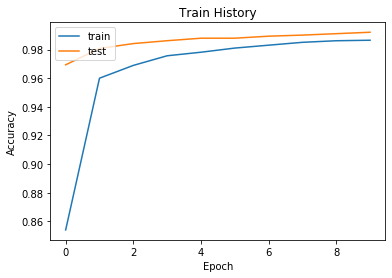

In [14]:
show_train_history('accuracy','val_accuracy')

评估模型的准确率

In [15]:
print("test set")
scores = model.evaluate(x_test4D_normalize , y_testOneHot)
print("")
print("The test loss is %f" % scores[1])

test set
10000/10000 [==============================] - 1s 79us/step

The test loss is 0.992100


预测结果

In [16]:
prediction=model.predict_classes(x_test4D_normalize)

In [17]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)